## Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.


0. An end-to-end Scikit-Learn workflow,
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [2]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [3]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# 1. getting data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# create X (feature matrix)
X = heart_disease.drop("target", axis = 1)

# create y (labels)
y = heart_disease["target"]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64, 1    165
 0    138
 Name: target, dtype: int64)

In [8]:
# 2. choose the right model and hyperparameters (hyperparameters are like dials on a model that you can tune to
# make it better or worst) #  Choose the right estimator/algorithm for our problems
# Random Forest Classifier (for classification problems)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
# clf = classifier/model

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. fit the model to training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# 0.2 means 80% of the data would be used for trainng 20% testing

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [12]:
y_test

286    0
133    1
248    0
92     1
43     1
      ..
287    0
95     1
283    0
285    0
241    0
Name: target, Length: 61, dtype: int64

In [13]:
# make a prediction
# this doesnt work...incorrect shape
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# using model to make prediction
# The whole point of training a machine learning model is to use it to make some kind of prediction in the future.

# Once our model instance is trained, you can use the predict() method to predict a target value given 
# a set of features. In other words, use the model, along with some unlabelled data to predict the label.

# Note, data you predict on has to be in the same shape as data you trained on.

In [ ]:
# In order to predict a label, data has to be in the same shape as X_train
X_test

In [ ]:
y_preds = clf.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
# 4 evaluating the model of train and test data

# Now we've made some predictions, we can start to use some more Scikit-Learn methods to figure out how good
# our model is.
# Each model or estimator has a built-in score method. This method compares how well the model was able to
# learn the patterns between the features and labels. In other words, it returns how accurate your model is.

clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
# more classification metrics we can use other then accuracy:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

In [ ]:
print(confusion_matrix(y_test,y_preds))

In [ ]:
print(accuracy_score(y_test,y_preds))

In [ ]:
# 5. improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Tying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on tet set: {clf.score(X_test,y_test)*100:2f}%")
    print("")                                                    

In [ ]:
#6. save a model and load
import pickle

#save a existing model to a file
pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [ ]:
# Load a saved model and make a prediction
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)


## 1. Getting our data ready to be used with machine learning
Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [ ]:
heart_disease.head()

In [ ]:
X = heart_disease.drop("target",axis =1)
X.head()

In [ ]:
y = heart_disease["target"]
y.head()

In [ ]:
# So in machine learning one of the most fundamental principles is never evaluate or test your models
# on data that it is learned from.
# Which is why we split it into training and test sets so scikit learn has a convenient function for allowing
# us to do that.
# So split the data into training and test sets.

In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 242 rows and 13 features(columns) 80% of training data
# 61 rows and 13 features(column) 20 % of test data
# 242 rows from 'target' column is 80% training data
# 61 rows from 'target' column is 20% test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
print(X.shape)
print(X.shape[0] * 0.8)
print(242+61)

In [ ]:
len(heart_disease)

## 1.1 make sure its all numerical

In [ ]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

In [ ]:
len(car_sales)

In [ ]:
car_sales.dtypes

In [ ]:
# X to predict y
# splitting into X/y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [ ]:
X.head()

In [ ]:
y.head(),y.value_counts()

In [ ]:
#splitting into training and split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# 800 rows and 4 features(columns) 80% of training data 
# 200 rows and 4 features(column) 20 % of test data 
# 800 rows from 'price' column is 80% training data 
# 200 rows from 'price' column is 20% test data 

In [ ]:
print(X.shape)
print(X.shape[0] * 0.8)
print(800+200)

In [ ]:
len(car_sales)

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create + train + run in,evaluate in 4 lines of code
model = RandomForestRegressor()

# We want to train it on the training data so it's going to learn the patterns the relationships between
# X variables and the price the label.
model.fit(X_train, y_train)

# we're gonna score it evaluated on the test data
model.score(X_test, y_test)

In [ ]:
# Oops... this doesn't work, we'll have to convert it to numbers first.(previous cell giving error)

In [ ]:
X.head()

In [ ]:
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
One_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot", One_hot, categorical_features)],remainder = "passthrough")
                                 
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
X.head()

In [ ]:
# fitting it in dataframe
pd.DataFrame(transformed_X)

In [ ]:
# 2nd alternative #Turn the categories (Make and Colour) into numbers
# "Doors" are numerical so it didnt work over here but it worked in 1st methood
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# let's refit the model. taking "y" as didnt changed anything in previous cells
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
X.head()

In [ ]:
#evaluate
model.score(X_test, y_test)

## 1.2 what if there are missing values?
1. fill them with values(also known as imputation)
2. Remove the samples with missing data all together

In [ ]:
# Many machine learning models don't work well when there are missing values in the data.

# There are two main options when dealing with missing values.

# Fill them with some given value. For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of filling missing values is often referred to as imputation.
# Remove them. If a row has missing values, you may opt to remove them completely from your sample completely. However, this potentially results in using less data to build your model.
# Note: Dealing with missing values is a problem to problem issue. And there's often no best way to do it.

In [ ]:
# import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
# check how many data is missing
car_sales_missing.isna().sum()

In [ ]:
#create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [ ]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Let's try and convert our data to numbers
# Turn the categories(make, colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
# Ahh... this doesn't work. We'll have to either fill or remove the missing values.

# Let's see what values are missing again.

In [ ]:
car_sales_missing

In [ ]:
car_sales_missing["Doors"].value_counts()

## 1.2.1 Fill missing data with pandas (option 1)
What we'll do is fill the rows where categorical values are missing with "missing", the numerical features with the mean or 4 for the doors. And drop the rows where the Price is missing.

We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

Note: The practice of filling missing data is called imputation. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching for "data imputation techniques".

In [ ]:
# fill the 'make' column
car_sales_missing["Make"].fillna("missing", inplace = True)

# fill the 'colour' column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# fill the 'Odometer (KM)' column with mean
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# # fill the 'Doors' column with 4
car_sales_missing["Doors"].fillna(4, inplace = True)


In [ ]:
# check our dataframe again
car_sales_missing.isna().sum()

In [ ]:
# removing row with missing price value/labels
car_sales_missing.dropna(inplace = True)

In [ ]:
# check data frame again
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)
# we lost 50 rows from 1000 rows = 950

In [ ]:
# re-create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [ ]:
# Let's convert the categorical columns to one hot encoded (code copied from above)
# Let's try and convert our data to numbers
# Turn the categories(make, colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing) # if we put just"x" as above it will not show numbers
transformed_X

In [ ]:
X

## 1.2.2 Fill missing data with Scikit-Learn (option 2)
Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, scikit-learn provides another method called SimpleImputer() which allows us to do a similar thing.

SimpleImputer() transforms data by filling missing values with a given strategy.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [ ]:
# importing again as we have filled all missing values in above cells. (using "mising" and in above used "missing")
car_sales_mising = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_mising.head()
#print(len(car_sales_missing))

In [ ]:
car_sales_mising.isna().sum()

In [ ]:
# Drop the rows with missing in the "Price" column(no labels)
car_sales_mising.dropna(subset=["Price"], inplace = True)

In [ ]:
car_sales_mising.isna().sum()

In [ ]:
# Well we want to split into x and y.
# Plenty of practice doing this this is what a lot of lot of machine learning problems end up being right
# is it's turning your data into features and labels and then getting a machine learning model to hopefully
# learn some patterns in those features and predict labels.
# That's what we're going to try and do here.
# Access equals one beautiful why we've seen this before.
# Car sales missing price.
# So again we're just using these four columns here to predict the price column.
X = car_sales_mising.drop("Price", axis=1)
y = car_sales_mising["Price"]

In [ ]:
X.isna().sum()
#y.isna().sum()

In [ ]:
# fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value = 4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer',door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#### using n_estimator=100
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled), len(car_sales), len(car_sales_missing)

For now, the key takeaways to remember are:

1.Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
2.For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as feature engineering or feature encoding.
3.Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as data imputation.

In [ ]:
#so the process of filling missing values is called imputation and the process of turning your non

#numerical values into numerical values is referred to as feature engineering or feature encoding.

In [ ]:
what_were_covering

## 2. Choosing the right estimator/algorithm for our problem¶
**Scikit-Learn uses estimator as another term for machine learning model or algorithm.**

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

step 1: Check the Scikit-Learn machine learning map.... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

**Some things to note:**

* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
* Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

## 2.1 Picking a machine learning model for a regression problem

In [16]:
# importing boston hoousing data set
from sklearn.datasets import load_boston
boston = load_boston()
boston; # imports as dictionary

Since it's in a dictionary, let's turn it into a DataFrame so we can inspect it better.

In [17]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# how many samples
len(boston_df)

506

In [21]:
boston_df.isna().sum()
# no missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [22]:
boston_df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Beautiful, our goal here is to use the feature columns, such as CRIM, which is the per capita crime rate by town, AGE, the proportion of owner-occupied units built prior to 1940 and more to predict the target column. Where the target column is the median house prices.

In essence, each row is a different town in Boston (the data) and we're trying to build a model to predict the median house price (the label) of a town given a series of attributes about the town.

**Since we have data and labels, this is a supervised learning problem. And since we're trying to predict a number, it's a regression problem.**

Knowing these two things, how do they line up on the Scikit-Learn machine learning algorithm cheat-sheet?

Following the map through, knowing what we know, it suggests we try RidgeRegression. Let's chek it out.

In [23]:
# let's try Ridge Regression Model
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

#create the data. X to predict y
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#split in to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# check the score of Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

#how do we improve this score?
#what if Ridge was not working?
#let us refer back map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

The next step would be to try EnsembleRegressors. Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the Random Forest. Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, An Implementation and Explanation of the Random Forest in Python by Will Koehrsen is a great read. https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

Since we're working with regression, we'll use Scikit-Learn's RandomForestRegressor.

We can use the exact same workflow as above. Except for changing the model.

In [24]:
# let us try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

#create the data. X to predict y
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

#split in to train and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate Random FOrest Regressor model
rf = RandomForestRegressor() #n_estimators = 100 (to remove warning)
rf.fit(X_train, y_train)

# check the score of Random Forest Regressor on test data
rf.score(X_test, y_test)


/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8765210916447665

In [25]:
# check the Ridge model again
model.score(X_test,y_test)

0.6662221670168522

## 2.2 choosing an estimator for classification problem

#scikit learn map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [239]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
len(heart_disease)

303

consulting the map and it says LinearSVC

In [28]:
# checking for missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Similar to the Boston housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

So what do we know?

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Following the cheat-sheet we end up at LinearSVC which stands for Linear Support Vector Classifier. Let's try it on our data.

In [29]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# make the data. X to predict y
X = heart_disease.drop("target", axis = 1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate LinearSVC
#clf means classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# evaluate the LinearSVC # check the score of model on test data
clf.score(X_test, y_test)

/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

In [30]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Straight out of the box (with no tuning or improvements) the model scores 47% accuracy, which with 2 classes (heart disease or not) is as good as guessing.

With this result, we'll go back to our diagram and see what our options are.

Following the path (and skipping a few, don't worry, we'll get to this) we come up to EnsembleMethods again. Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our RandomForestRegressor from above? We'll it has a dance partner, RandomForestClassifier which is an ensemble based machine model learning model for classification. You might be able to guess what we can use it for.

In [31]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data. X to predict y
X = heart_disease.drop("target", axis = 1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate RandomForestClassifier
#clf means classifier
clf = RandomForestClassifier(n_estimators = 100) #'n_estimators = 100' then no error will be seen, error bcoz of sklearn version difference
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier # check the score of model on test data
clf.score(X_test, y_test)

0.8524590163934426

Using the RandomForestClassifier we get almost double the score of LinearSVC.

One thing to remember, is both models are yet to receive any hyperparameter tuning. Hyperparameter tuning is fancy term for adjusting some settings on a model to try and make it better. It usually happens once you've found a decent baseline result you'd like to improve upon.

In this case, we'd probably take the RandomForestClassifier and try and improve it with hyperparameter tuning (which we'll see later on).

What about the other models?
Looking at the cheat-sheet and the examples above, you may have noticed we've skipped a few.

Why?

The first reason is time. Covering every single one would take a fair bit longer than what we've done here. And the second one is the effectiveness of ensemble methods.

**A little tidbit for modelling in machine learning is:**

* **If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.**
* **If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.**

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:

* Random Forest Wikipedia
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen
 
Experiment until something works
The beautiful thing is, the way the Scikit-Learn API is designed, once you know the way with one model, using another is much the same.

And since a big part of being a machine learning engineer or data scientist is experimenting, you might want to try out some of the other models on the cheat-sheet and see how you go. The more you can reduce the time between experiments, the better.

In [32]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
what_were_covering
#0,1,2 done till now

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. fit the model/algorithm and use it to make predictions on our data
Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

# 3.1 fitting the model to the data
In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(X, y).

Where X is a feature array and y is a target array.

Other names for X include:

* Data
* Feature variables
* Features

Other names for y include:

* Labels
* Target variable

**For supervised learning there is usually an X and y. For unsupervised learning, there's no y (no labels).**

Let's revisit the example of using patient data (X) to predict whether or not they have heart disease (y).

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [34]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# make the data. X to predict y
X = heart_disease.drop("target", axis = 1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instantiate RandomForestClassifier
#clf means classifier
clf = RandomForestClassifier(n_estimators = 100) #'n_estimators = 100' then no error will be seen, error bcoz of sklearn version difference

# fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier # check the score of model on test data (use the patterns the model has lerned)
clf.score(X_test, y_test)

0.8524590163934426

What's happening here?

Calling the fit() method will cause the machine learning algorithm to attempt to find patterns between X and y. Or if there's no y, it'll only find the patterns within X.

Let's see X.

In [35]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [37]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

Passing X and y to fit() will cause the model to go through all of the examples in X (data) and see what their corresponding y (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook.

For now, you could imagine it similar to how you would figure out patterns if you had enough time.

You'd look at the feature variables, X, the age, sex, chol (cholesterol) and see what different values led to the labels, y, 1 for heart disease, 0 for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training (finding patterns in data):**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing or in production (using learned patterns):**

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

* Random Forest Wikipedia
* Random Forest Wikipedia (simple version)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen



## 3.2 Make predictions using machine learning model

Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. **Two of the most common and useful are predict() and predict_proba().**

Let's see them in action.

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [38]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
X_test
#X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [40]:
#clf.predict(X_test.head()) # shows only 5 values as its head
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [41]:
#y_test
# fitting it in array
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

Given data in the form of X, the predict() function returns labels in the form of y.

It's standard practice to save these predictions to a variable named something like y_preds for later comparison to y_test or y_true (usually same as y_test just another name).

In [42]:
#compare predictions to test/true/truth lables to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [43]:
# from where does the above cell(0.85) number come from?
# Returns the mean accuracy on the given test data and labels.(shift+ tab on 'clf.score')
clf.score(X_test, y_test)

0.8524590163934426

Another way of doing this is with Scikit-Learn's accuracy_score() function.


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

**Note:** For the predict() function to work, it must be passed X (data) in the same format the model was trained on. Anything different and it will return an error.

predict_proba() returns the probabilities of a classification label.

Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

# predict() vs predict_proba()
 make predictions with predict_proba()


In [45]:
# predict_proba() returns the probabilities of a classification model
# return probabilities rather than lables
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [46]:
# let's predict() on same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [47]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [48]:
heart_disease['target'].value_counts()
# 1 for hear disease and 0 for not heart disese

1    165
0    138
Name: target, dtype: int64

## making predictions with our model(regression)

predict() can also be used for regression models.

In [49]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate and fit model (learn the patterns, on training set)
model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
#model.fit(X_train, y_train) # combining with previous line

#make predictions
y_preds = model.predict(X_test)
 

In [51]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [52]:
np.array(y_test[:10])
#y_test[:10]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [53]:
#compare the predictions to the truth/test/true
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

 Now we've seen how to get a model how to find patterns in data using the fit() function and make predictions using what its learned using the predict() and predict_proba() functions, it's time to evaluate those predictions.

In [54]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

# 4. Evaluating a machine learning model (score)

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

## 4.1 General model evaluation with score()
If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the score() method come into play.

In [55]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
clf.score(X_train, y_train)

1.0

In [57]:
clf.score(X_test, y_test)

0.8524590163934426

let us do the same but for regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate and fit model (learn the patterns, on training set)
model = RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
#model.fit(X_train, y_train) # combining with previous line
 

In [59]:
# Check the score of the model (on the test set)
model.score(X_test,y_test)

0.873969014117403

Here, model is an instance of RandomForestRegressor. And since it's a regression model, the default metric built into score() is the coefficient of determination or R^2 (pronounced R-sqaured).

Remember, you can find this by pressing SHIFT + TAB within the brackets of score() when called on a model instance.

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the score() method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

In [60]:
model.score(X_train, y_train)

0.976679849361528

## 4.2 Evaluating your models using the scoring parameter
The next step up from using score() is to use a custom scoring parameter with cross_val_score() or GridSearchCV.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment but first let's check out cross_val_score().

To do so, we'll copy the heart disease classification code from above and then add another line at the top.



In [61]:
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators = 100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Using cross_val_score() is slightly different to score(). Let's see a code example first and then we'll go through the details.



In [62]:
clf.score(X_test,y_test)

0.8524590163934426

In [63]:
# Using cross_val_score()
cross_val_score(clf,X,y)

/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82178218, 0.84158416, 0.78217822])

What's happening here?

The first difference you might notice is cross_val_score() returns an array where as score() only returns a single number.

cross_val_score() returns an array because of a parameter called cv, which stands for cross-validation.

When cv isn't set, cross_val_score() will return an array of 3 numbers by default (or 5 by default if you're using Scikit-Learn version 0.22+).

Remember, you can see the parameters of a function using SHIFT + TAB from within the brackets.

But wait, you might be thinking, what even is cross-validation?


But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.


Not training on all the data
Avoiding getting lucky scores on single splits of the data
Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup K-fold cross-validation. Where K is an abitrary number. We've used 5 because it looks nice visually, and will be the default in Scikit-Learn from version 0.22 onwards.

In [64]:
#without 'cv=5' we are getting error. read documentation shitft+tab
# 'cv=5' makes 5 different splits
cross_val_score(clf,X,y, cv=5) 

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

Since we set cv=5 (5-fold cross-validation), we get back 5 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.

Notice, the average cross_val_score() is slightly lower than single value returned by score().

In [65]:
cross_val_score(clf,X,y, cv=10) 

array([0.90322581, 0.80645161, 0.83870968, 0.90322581, 0.90322581,
       0.8       , 0.73333333, 0.86666667, 0.72413793, 0.79310345])

In [66]:
np.random.seed(42)

# single training adn test split score
clf_single_score = clf.score(X_test, y_test)

# take the of 5 fold cross_validation_score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validated metric over the non-cross-validated metric.

We haven't used the scoring parameter at all.

By default, it's set to None.

In [67]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring
# value slight different as seed not set

When scoring is set to None (by default), it uses the same metric as score() for whatever model is passed to cross_val_score().

In this case, our model is clf which is an instance of RandomForestClassifier which uses mean accuracy as the default score() metric.

You can change the evaluation score cross_val_score() uses by changing the scoring parameter.

And as you might have guessed, different problems call for different evaluation scores.

The Scikit-Learn documentation outlines a vast range of evaluation metrics for different problems but let's have a look at a few.
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

**Accuracy**

In [68]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [69]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators = 100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [70]:
np.mean(cross_val_score)

0.8248087431693989

**Accuracy**

Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [71]:
#accuracy as percentage
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


# evaluating a classification model 2 (ROC/AUC curve)
Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curv

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the roc_curve function.

In [72]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)
                        

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]), 61)

In [74]:
y_probs_positive = y_probs[:,1] # column 1 of every row
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [75]:
# calculate fpr, tpr, and thresholds
fpr,tpr, thresholds, = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

Looking at these on their own doesn't make much sense. It's much easier to see their value visually.

Since Scikit-Learn doesn't have a built-in function to plot a ROC curve, quite often, you'll find a function (or write your own) like the one below.

# Evaluating a classification model 3 (ROC curve)

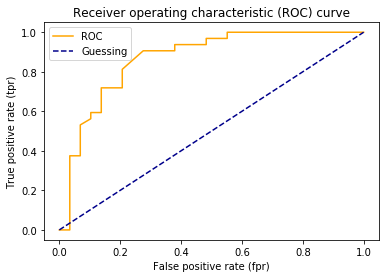

In [76]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)
              
              
              

Looking at the plot for the first time, it might seem a bit confusing.

The main thing to take away here is our model is doing far better than guessing.

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve). Scikit-Learn implements a function to caculate this called roc_auc_score().

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.

In [77]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

The most ideal position for a ROC curve to run along the top left corner of the plot.

This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.

You can see this by creating a ROC curve using only the y_test labels.

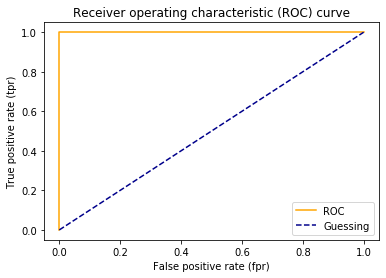

In [78]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [79]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

In reality, a perfect ROC curve is unlikely.

# Evaluating a classification model 4(confusion matrix)
**confusion matrix**

The next way to evaluate a classification model is by using a confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [80]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

Again, this is probably easier visualized.

One way to do it is with pd.crosstab().

In [81]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [82]:
22 + 7 + 5 + 27

61

In [83]:
print(len(X_test))
print(len(y_preds))

61
61


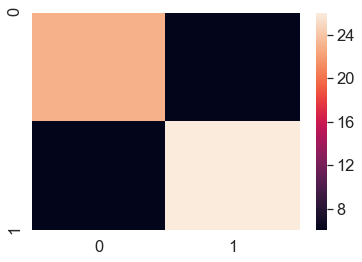

In [84]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale = 1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

Ahh.. that plot isn't offering much. Let's add some commucation and functionise it.


# evaluating a classification model 5(confusion matrix)



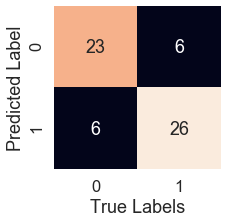

In [85]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seaborn's heatmap()
    """
    
    flg,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Label')
    
    # fix the broken annotation (this happened in matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top -0.5)
    
plot_conf_mat(conf_mat)

An ideal confusion matrix no values out of the diagonal. This means all of models predictions match the actual labels.


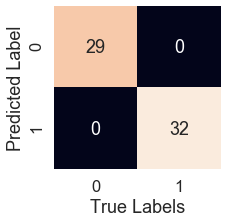

In [86]:
# Create perfect confusion matrix
perfect_conf_mat = confusion_matrix(y_test, y_test)
plot_conf_mat(perfect_conf_mat)

Scikit-Learn has an implementation of plotting a confusion matrix in plot_confusion_matrix(), however, the documentation on it isn't complete (at the time of writing).

And trying to import it returns an error.

You can try to use it but beware.

In [87]:

# Returns an error.... (at time of writing)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

# evaluating a classification model 6(classification report)
**Classification report**

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's classification_report() function.

Let's see one.

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61




It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into account. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [89]:

# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.

If false positive predictions are worse than false negatives, aim for higher precision.

If false negative predictions are worse than false positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

#  evaluation a Regression model 1 (R2score)
# 4.2.2 Regression model evaluation metrics¶

Similar to classification, there are several metrics you can use to evaluate your regression models.... https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Model evaluation metrics documentation... https://scikit-learn.org/stable/modules/model_evaluation.html

We'll check out the following.

**1. R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**2. Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

**3. Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Let's see them in action. First, we'll bring down our regression model code again.

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [113]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train);

**R^2 Score (coefficient of determination)**

Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.

In [114]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.873969014117403

Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.

A model which only predicted the mean would get a score of 0.

In [115]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [116]:
#print(y_test)
y_test.mean()

21.488235294117654

In [117]:
#y_test_mean

In [118]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [119]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test, y_test)

1.0

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

# evaluating a regression model 2 (MAE)
**Mean absolue error (MAE)**

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

A model's mean absolute error can be calculated with Scikit-Learn's mean_absolute_error() function.

In [121]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

#evaluation metrics are always comparing truth lables to predicted labels
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

Our model achieves an MAE of 2.122. This means, on average our models predictions are 2.122 units away from the actual value.

Let's make it a little more visual.

In [122]:
df = pd.DataFrame(data ={'actual_values': y_test,
                        'predicted_values': y_preds})

In [127]:
#df
df['Differences'] = df['predicted_values'] - df['actual_values']
df

,actual_values,predicted_values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [131]:
# not included in video
# fig, ax = plt.subplots()
# x = np.arange(0, len(df), 1)
# ax.scatter(x, df["actual_values"], c='b', label="Acutual_Values")
# ax.scatter(x, df["predicted_values"], c='r', label="predicted_values")
# ax.legend(loc=(1, 0.5));

#  Evaluating a regression model 3 (MSE)

**Mean squared error (MSE)**


In [133]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [137]:
# calculate MSE by hand
squared = np.square(df['Differences'])
squared.mean()

9.24232899019608

MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

Now you might be thinking, which regression evaluation metric should you use?

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    * Pay more attention to MAE: When being \$10,000 off is ***twice*** as bad as being \$5,000 off.
    * Pay more attention to MSE: When being \$10,000 off is ***more than twice*** as bad as being \$5,000 off.

Note: What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the Scikit-Learn metrics and scoring documentation.


#  machine learning model evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques**

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

**Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

**Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

**ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

**Area Under Curve (AUC) Score** - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**

**Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

**Precision and recall** become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

**F1-score** is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**

**R^2 (pronounced r-squared) or the coefficient of determination** - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

**Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use?**

**R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

**MAE** gives a better indication of how far off each of your model's predictions are on average.

As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

    * Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

    * Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

 # evaluating a model with cross validation and scoring parameter
# 4.2.3 finally using scoring parameter
Woah. We've covered a bunch but haven't even touched the scoring parameter...

As a refresh, the scoring parameter can be used with a function like cross_val_score() to tell Scikit-Learn what evaluation metric to return using cross-validation.

## **Let's check it out with our classification model and the heart disease dataset.**

In [214]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators = 100)

First, we'll use the default, which is mean accuracy.

In [146]:
#train 5 models set and evaluate them on different test sets  
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validated accuracy.

In [147]:
# cross validated accuracy 
#np.mean(cv_acc)
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


We can find the same using the scoring parameter and passing it "accuracy".

In [154]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
#cv_acc
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification.

Let's try "precision".

In [156]:
# precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
#cv_precision
np.mean(cv_precision)

0.8209201193072161

In [169]:
# recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
#cv_recall
np.mean(cv_recall)

0.8424242424242424

In [201]:
# np.random.seed(42)
# cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
# np.mean(cv_recall)

In [202]:
# f1 or f1 score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring='f1')
np.mean(cv_f1)

0.8231854226519981

We can repeat this process with our regression metrics.
# Lets check out regression model

In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

model = RandomForestRegressor(n_estimators = 100)

In [206]:
#model.score() # shitf+tab
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring = None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [207]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring = 'r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

But we can use "neg_mean_absolute_error" for MAE (mean absolute error).

In [209]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.06211765, -2.5060396 , -3.35824752, -3.81479208, -3.20442574])

Why the "neg_"?

Because Scikit-Learn documentation states:

"All scorer objects follow the convention that higher return values are better than lower return values."
https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

Which in this case, means a lower negative value (closer to 0) is better.

What about "neg_mean_squared_error" for MSE (mean squared error)?

In [210]:
# mean squared error
cv_mse = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.39124675, -12.80369927, -21.44045174, -46.88481495,
       -19.38141243])

In [211]:
np.mean(cv_mse)

-21.580325026247316

# evaluating a model with scikit learn functions
## 4.3 Using different evaluation metrics with Scikit-Learn
Remember the third way of evaluating Scikit-Learn functions?

    1. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called y_preds to an array of actual labels, usually called y_test or y_true.

Classification functions
For:

* Accuracy we can use accuracy_score()
* Precision we can use precision_score()
* Recall we can use recall_score()
* F1 we can use f1_score()

**Classification evaluation functions**



In [242]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

# make some predictions
y_preds = clf.predict(X_test)

# evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


The same goes for the regression problem.

**Regression metrics**
For:

* R^2 we can use r2_score()
* MAE (mean absolute error) we can use mean_absolute_error()
* MSE (mean squared error) we can use mean_squared_error()

In [243]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


In [245]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

# 5. improving a model (hyperparameter tuning)
The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

From a data perspective asks:

    * Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
    * Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.
From a model perspective asks:

    * Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
    * Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?
**Note**: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we have two existing datasets, we'll come at exploration from a model perspective.

More specifically, we'll look at how we could improve our RandomForestClassifier and RandomForestRegressor models through hyperparameter tuning.

What even are hyperparameters?

Good question, let's check it out. First, we'll instantiate a RandomForestClassifier.

________________________________________________________________________________________________

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [246]:
# how to find hyperparameter
from sklearn.ensemble import RandomForestClassifier

#instantiate
clf = RandomForestClassifier(n_estimators = 100)


When you instantiate a model like above, you're using the default hyperparameters.

These get printed out when you call the model instance and get_params().

In [248]:
# calling hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

You'll see things like max_depth, min_samples_split, n_estimators.

Each of these is a hyperparameter of the RandomForestClassifier you can adjust.

You can think of hyperparameters as being similar to dials on an oven. On the default setting your oven might do an okay job cooking your favourite meal. But with a little experimentation, you find it does better when you adjust the settings.


The same goes for imporving a machine learning model by hyperparameter tuning. The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

Every machine learning model will have different hyperparameters you can tune.

You might be thinking, "how the hell do I remember all of these?"

And it's a good question. It's why we're focused on the Random Forest. Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one. And then knowing these principles, you can apply them to a different model if needed.

Reading the Scikit-Learn documentation for the Random Forest, you'll find they suggest trying to change n_estimators (the number of trees in the forest) and min_samples_split (the minimum number of samples required to split an internal node).

We'll try tuning these as well as:

* max_features (the number of features to consider when looking for the best split)
* max_depth (the maximum depth of the tree)
* min_samples_leaf (the minimum number of samples required to be at a leaf node)
If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

# tuning hyperparameters
# 5.1 tuning hyperparameters by hand 
# Let's make 3 sets, training, validation and test.

So far we've worked with training and test datasets.

You train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a thrid set, a validation set.

Now the process becomes, train a model on the training data, (try to) improve its hyperparameters on the validation set and evaluate it on the test set.

If our starting dataset contained 100 different patient records labels indicating who had heart disease and who didn't and we wanted to build a machine learning model to predict who had heart disease and who didn't


Since we know we're using a RandomForestClassifier and we know the hyperparameters we want to adjust, let's see what it looks like.

First, let's remind ourselves of the base parameters.

**Let's make 3 sets, training, validation and test.**

In [249]:
# base line parameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

And we're going to adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.

In [250]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict


In [261]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

#len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score: 0.84


/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [260]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Beautiful, now let's try and improve the results.

We'll change 1 of the hyperparameters, n_estimators to 100 and see if it improves on the validation set.

In [262]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


How about we try another parameter?

Wait...

This could take a while if all we're doing is building new models with new hyperparameters each time.

Surely there's a better way?

There is.

#  tuning hyperparameters 2
## 5.2 Hyperparameter tuning with RandomizedSearchCV
Scikit-Learn's RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Let's see it in action.

First, we create a grid (dictionary) of hyperparameters we'd like to search over.




**additional important information**

Where did these values come from?

They're made up.

Made up?

Yes. Not completely pulled out of the air but after reading the Scikit-Learn documentation on Random Forest's you'll see some of these values have certain values which usually perform well and certain hyperparameters take strings rather than integers.

Now we've got the grid setup, Scikit-Learn's RandomizedSearchCV will look at it, pick a random value from each, instantiate a model with those values and test each model.

How many models will it test?

As many as there are for each combination of hyperparameters to be tested. Let's add them up.

max_depth has 4, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5. That's 4x2x3x3x5 = 360 models!

Or...

We can set the n_iter parameter to limit the number of models RandomizedSearchCV tests.

The best thing? The results we get will be cross-validated (hence the CV in RandomizedSearchCV) so we can use train_test_split().

And since we're going over so many different models, we'll set n_jobs to -1 of RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.

Let's see it in action.

Note: Depending on n_iter (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while.

Note 2: Setting n_jobs=-1 seems to be breaking on some machines (for me at least, as of 8 December 2019). There seems to be an issue about it, being tracked on GitHub. For the timebeing, n_jobs=1 seems to be working.

In [263]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10, 100, 200, 500, 1000, 1200],
       'max_depth': [None, 5, 10, 20, 30],
       'max_features': ['auto', 'sqrt'],
       'min_samples_split': [2,4,6],
       'min_samples_leaf': [1,2,4]}

np.random.seed(42)

#split into X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate RandomForestClassifier
# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10, # numbers of model to try
                           cv = 5,
                           verbose = 2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.2s finished
/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

When RandomizedSearchCV goes through n_iter combinations of of hyperparameter search space, it stores the best ones in the attribute best_params_.

In [267]:
# which combination from above got best reults
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

Now when we call predict() on rs_clf (our RandomizedSearchCV version of our classifier), it'll use the best hyperparameters it found.

In [268]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


# tuning hyperparameter 3
## 5.3 Hyperparameter tuning with GridSearchCV
The main difference between GridSearchCV and RandomizedSearchCV is GridSearchCV searches across a grid of hyperparamters exhaustively, where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

For example, let's see our grid of hyperparameters.

In [269]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

RandomizedSearchCV try n_iter combinations of different values. Where as, GridSearchCV will try every single possible combination.

And if you remember from before when we did the calculation: max_depth has 4, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5.

That's 4x2x3x3x5 = 360 models!

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).

In our case, the data we're using is relatively small (only ~300 samples).

Since we've already tried to find some ideal hyperparameters using RandomizedSearchCV, we'll create another hyperparameter grid based on the best_params_ of rs_clf* with less options and then try to use GridSearchCV to find a more ideal set.

**Note**: Based on the best_params_ of rs_clf implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by RandomizedSearchCV.

In [274]:
6*5*2*3*3*5 #(last 5 is cv, cross validated)

2700

In [275]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [278]:
3*1*2*1*2*5 # 5 is cv, cross vaidator

60

In [280]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split into X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instantiate RandomForestClassifier
# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                          cv = 5,
                          verbose = 2)

# fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.6s finished
/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [283]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

And by default when we call the predict() function on gs_clf, it'll use the best hyperparameters.



In [284]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's create a DataFrame to compare the different metrics.



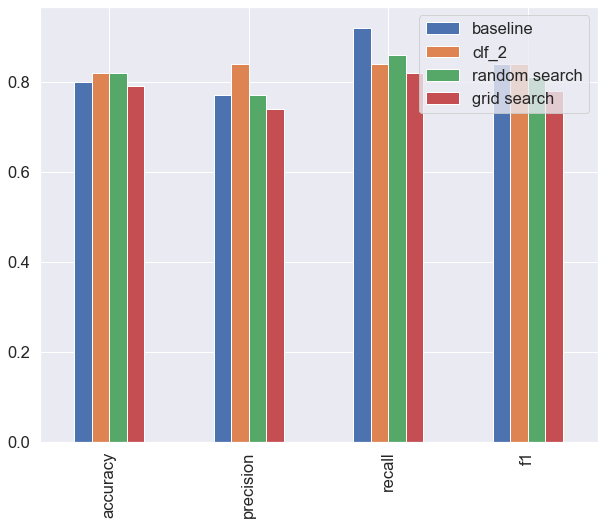

In [285]:

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV but it's likely these improvements will be marginal.

A few next ideas you could try:

* Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.

Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now you've got a somewhat tuned Random Forest model, the next thing you might want to do is export it and save it so you could share it with your team or use it in an application without having to retrain it.

# 6. saving and loading trained machine learning model
Two ways to save and load machine learning models:

1. With Python's pickle module
2. With the joblib module

**Pickle**

# saving and loadel model 2

In [286]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 7. putting it all together 
**Revisit the pipeline one more time, knowing what we know now**

We've covered a lot. And so far, it seems to be all over the place, which it is. But not to worry, machine learning projects often start out like this. A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.

What would this refinement process look like?

We'll use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, we'll be using Scikit-Learn's Pipeline class. You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

**7.1 Creating a regression Pipeline**

You might recall when, way back in Section 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.

The code we used worked, but it was a bit all over the place. Good news is, Pipeline can help us clean it up.

Let's remind ourselves what the data looks like.

In [288]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [291]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [294]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (Make, Colour, Doors), the other two are numerical (Odometer (KM), Price) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

We'll build a Pipeline() to do so.
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Pipeline()'s main input is steps which is a list ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform. 

In our case, you could think of the steps as: steps we want to do (all in one cell)

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

Let's do it.

In [298]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels. dropping rows with missing price
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace = True)

# define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('OneHot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_feature = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_feature),
                        ('num', numeric_transformer, numeric_feature)
                    ])

# create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', RandomForestRegressor())])

# split data
X = data.drop('Price', axis = 1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/vishweshjoshi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1821575815702311

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a Pipeline().

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter.

The prefix is the name of the Pipeline step you'd like to alter, followed by two underscores.

For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators".

Let's see it.

# 137 putting it all together 2
It's also possible to use GridSearchCV or RandomizedSesrchCV with our Pipeline

In [299]:
# Use GridSearchCV with our regression Pipeline # hyperparameters with gridsearch
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.1s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   0.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   47.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [300]:
gs_model.score(X_test, y_test)

0.3337859800130589

Beautiful! Using GridSearchCV we see a nice boost in our models score. And the best thing is, because it's all in a Pipeline, we could easily replicate these results.


In [302]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']